## IMPLEMENTING NEURAL NETWORK FROM SCRATCH

### In this notebook I have created a neural network with a single hidden layer from scratch and also solved the XOR problem using the same.
### The optimization algorithm used for this Neural Network is stochastic gradient descent.

#### Hyperparameters are :
#### input_layer = Number of input layer nodes
#### hidden_layer = Number of hidden layer nodes
#### output_layer = Number of output layer nodes
#### hidden_activation = Activation function for hidden layer
#### output activation = Activation function for output layer
#### n_iters = Number of iterations or epochs
#### n = learning rate

In [2482]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')


class NeuralNet:
    def __init__(self, input_layer = 2, hidden_layer = 0, output_layer = 1, hidden_activation = 'Sigmoid', output_activation = 'Sigmoid', n_iters = 1000, n = 0.1):
        np.random.seed(1)
        self.input_layer = input_layer
        self.hidden_layer = hidden_layer
        self.output_layer = output_layer
        self.loss= []
        self.hidden_activation = hidden_activation
        self.output_activation = output_activation
        self.n_iters = n_iters
        self.learning_rate = n
        self.Weights = []
#         self.Weights = [np.array([[0.2, 0.4],[0.1, 0.3]]), np.array([[0.6],[0.5]])]
        
        # INITIALIZING RANDOM WEIGHTS AND BIASES
        if self.hidden_layer != 0:
            self.W1 = np.random.uniform(0,1,(self.input_layer, self.hidden_layer))
            self.W2 = np.random.uniform(0,1,(self.hidden_layer, self.output_layer))
            self.b = np.random.uniform(0,1,self.hidden_layer)
            self.Weights.append(self.W1)
            self.Weights.append(self.W2)
            self.bias = [np.array([self.b[0]]*self.hidden_layer), np.array([self.b[1]]*self.output_layer)]
        else:
            self.W1 = np.random.uniform(0,1,(self.input_layer, self.output_layer))
            self.Weights.append(self.W1)
            self.b = np.random.uniform(0,1,1)
            self.bias = [np.array([self.b[0]]*self.output_layer)]
            
#         self.b = np.array([0.6, 0.5])
#         self.bias = [np.array([self.b[0]]*self.hidden_layer), np.array([self.b[1]]*self.output_layer)]
        
        print('Random Initialized Weights:',self.Weights)
        print('Random Initialized Bias:',self.bias)
        print(f'Input layer: {self.input_layer} nodes')
        print(f'Hidden layer: {self.hidden_layer} nodes')
        print(f'Output layer: {self.output_layer} nodes')
        print(f'Learning Rate: {self.learning_rate}')
        print(f'Iterations: {self.n_iters}')
        print(f'Hidden Activation: {self.hidden_activation}')
        print(f'Output Activation: {self.output_activation}')
        
    # SIGMOID FUNCTION-----------------------------------------------------------------------------------------------
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    # SIGMOID DERIVATIVE---------------------------------------------------------------------------------------------
    def sigmoid_derivative(self, z):
        return self.sigmoid(z) * (1 - self.sigmoid(z))
    
    # RELU FUNCTON---------------------------------------------------------------------------------------------------
    def Relu(self, z):
        z[z <= 0] = 0
        return z

    # RELU DERIVATIVE-------------------------------------------------------------------------------------------------
    def Relu_derivative(self, z):
        z = Relu(z)
        z[z<=0] = 0
        z[z>0] = 1
        return z
    
    # ACTIVATION FUNCTIONS FOR HIDDEN LAYER AND OUTPUT LAYER----------------------------------------------------------
    def Hidden_activation(self, z):
        if self.hidden_activation == 'Sigmoid':
            return self.sigmoid(z)
        if self.hidden_activation == 'Relu':
            return self.Relu(z)
    
    def Output_activation(self, z):
        if self.output_activation == 'Sigmoid':
            return self.sigmoid(z)
        
    def Hidden_activation_derivative(self, z):
        if self.hidden_activation == 'Sigmoid':
            return self.sigmoid_derivative(z)
        if self.hidden_activation == 'Relu':
            return self.Relu_derivative(z)
    
    def Output_activation_derivative(self, z):
        if self.output_activation == 'Sigmoid':
            return self.sigmoid_derivative(z)
    
            
    # 1 PASS FEED FORWARD ALGORITHM OF INPUTS-----------------------------------------------------------------------------     
    def feed_forward(self, inputs):
        self.z_out.append(inputs)
        self.a_out.append(inputs)
        flag = False
        for weights, bias in zip(self.Weights, self.bias):
            z = np.dot(weights.T, inputs) + bias
            if flag == True:
                a = self.Output_activation( z )
            else:
                a = self.Hidden_activation( z )
            self.z_out.append(z)
            self.a_out.append(a)
            
            inputs = a
            flag = True
        outputs = inputs
        return outputs
    
    # COMPUTING LAYER OUTPUT ERRORS----------------------------------------------------------------------------------------
    def layer_errors(self, loss):
        layer_errors = []
        for i in reversed(range(len(self.Weights))):
            if i == 0:
                pass
            else:
                layer_errors.append(np.dot(self.Weights[i], loss))
            return layer_errors
    
    # PREDICT OUTPUT AFTER TRAINING-----------------------------------------------------------------------------------------   
    def predict(self, inputs):
        pred = self.feed_forward(inputs)
#         print(pred)
#         if pred > 0.5:
#             return 1
#         else:
#             return 0
        return pred
                
        
    # BACKPROPAGATION ALGORITHM TO FIND OPTIMAL WEIGHTS---------------------------------------------------------------------            
    def back_propagate(self, X, y):
        self.X = X
        self.y = y
        for i in range(self.n_iters):
            for inputs, target in zip(self.X, self.y):
                #print(inputs, target)
                self.z_out= []
                self.a_out = []
                prediction = self.feed_forward(inputs)
                loss = (prediction - target) ** 2
                loss_der = 2 * (prediction - target) * self.Output_activation_derivative(self.z_out[len(self.z_out)-1])
                #COMPUTING HIDDEN LAYER OUTPUT ERROR 
                layer_errors = self.layer_errors(loss_der)
                #print('layer_errors:', layer_errors)

                # UPDATE WEIGHT FOR EACH LAYER
                for i in reversed(range(len(self.Weights))):
                    # DERIVATIVE OF LOSS WITH RESPECT TO WEIGHTS AND BIAS FOR OUTPUT LAYER                  
                    if i==len(self.Weights)-1:
                        dloss_dW = ((2*(self.a_out[i+1] - target)) * self.Output_activation_derivative(self.z_out[i+1])).reshape(1,-1)

                        dloss_dW = np.matmul(self.a_out[i].reshape(1,-1).T,  dloss_dW )
#                       print("dloss_dW:", dloss_dW)
                        dloss_dB = (2*(self.a_out[i+1] - target)) * self.Output_activation_derivative(self.z_out[i+1])
#                       print("dloss_dB:", dloss_dB)
                    # DERIVATIVE OF LOSS WITH RESPECT TO WEIGHTS AND BIAS FOR HIDDEN LAYERS
                    else:
                        dloss_dW = ((2*(layer_errors[i])) * self.Hidden_activation_derivative(self.z_out[i+1])).reshape(1,-1)

                        dloss_dW = np.matmul(self.a_out[i].reshape(1,-1).T,  dloss_dW )
#                       print("dloss_dW:", dloss_dW)

                        dloss_dB = (2*(layer_errors[i])) * self.Hidden_activation_derivative(self.z_out[i+1])
#                       print("dloss_dB:", dloss_dB)
                    
                    #UPDATING WEIGHTS AND BIASES
                    self.Weights[i] = self.Weights[i] - self.learning_rate * ( dloss_dW)

                    self.bias[i] = self.bias[i] - self.learning_rate * ( dloss_dB)
            # ADDING LOSS VALUES TO LIST
            self.loss.append(loss[0])
        print('FINAL WEIGHTS:',self.Weights)
        print('FINAL BIAS:',self.bias)
        
    #FUNCTION TO PLOT ERROR CURVE FOR NUMBER OF EPOCHS-----------------------------------------------------------------------   
    def plot_error(self,):
        plt.figure(figsize = (8,5))
        plt.scatter(list(range(self.n_iters)), self.loss)
        weights= self.Weights[0]
        if self.X.shape[1] == 2:
            for w in weights:
                line = -(w[0] * X[:,0] + self.bias[0][0])/ w[1]
            plt.xlabel('Number of Epochs')
            plt.ylabel('Loss')
            plt.plot() 
            plt.show()
    
    #FUNCTION TO PLOT DECISION BOUNDARY FOR THE GIVEN MODEL------------------------------------------------------------------
    def plot_boundary(self,):
        plt.figure(figsize = (8, 5))
        weights= self.Weights[0].T
        bias = self.bias[0] 
        if self.X.shape[1] == 2:
            plt.scatter(self.X[:,0], self.X[:,1], c =self.y[:])
            for w, b in zip(weights, bias):
                line = -(w[0] * self.X[:,0] + b)/ w[1]
                plt.plot(self.X[:,0], line, c = 'k')
            #plt.xlim(0,5)
            #plt.ylim(0,5)
            #plt.legend()
            plt.show()
        


### XOR Gate data

In [2472]:
data = np.array([[0,0,0],
       [0,1,1],
       [1,0,1],
       [1,1,0]])
X = data[:,:-1]
y = data[:, -1]
data

array([[0, 0, 0],
       [0, 1, 1],
       [1, 0, 1],
       [1, 1, 0]])

### Instantitating Neural Network with hyperparameters ( Hidden activation = Sigmoid)

In [2473]:
NN = NeuralNet(2,2,1, n_iters = 10000, n=0.1, hidden_activation = 'Sigmoid', output_activation = 'Sigmoid')
NN

Random Initialized Weights: [array([[4.17022005e-01, 7.20324493e-01],
       [1.14374817e-04, 3.02332573e-01]]), array([[0.14675589],
       [0.09233859]])]
Random Initialized Bias: [array([0.18626021, 0.18626021]), array([0.34556073])]
Input layer: 2 nodes
Hidden layer: 2 nodes
Output layer: 1 nodes
Learning Rate: 0.1
Iterations: 10000
Hidden Activation: Sigmoid
Output Activation: Sigmoid


### Backpropagation 

In [2474]:
NN.back_propagate(X, y)

FINAL WEIGHTS: [array([[ 6.31868971,  6.67856093],
       [-6.03656678, -6.77110735]]), array([[-7.28714118],
       [ 7.52303919]])]
FINAL BIAS: [array([ 2.98914803, -3.61405983]), array([3.45345578])]


### Predicting the outputs for the trained model

In [2475]:
print(NN.predict([0,0]))
print(NN.predict([0,1]))
print(NN.predict([1,0]))
print(NN.predict([1,1]))

[0.03601548]
[0.95784647]
[0.96625256]
[0.03270889]


### Plotting the error curve for the model (Hidden activation = Sigmoid)

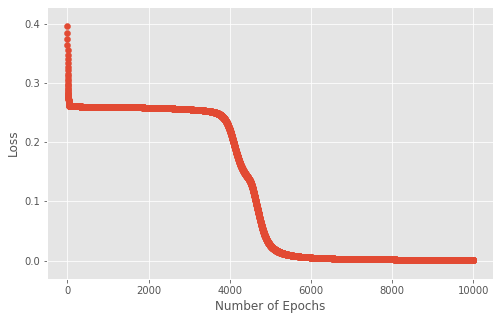

In [2477]:
NN.plot_error()

### Plotting Decision Boundary for the model (Hidden activation = Sigmoid)

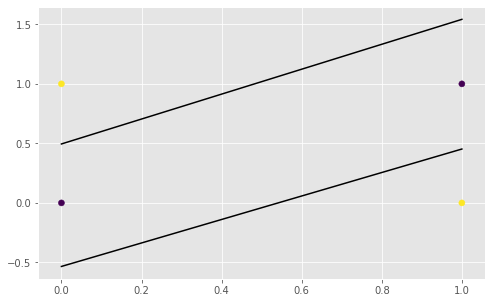

In [2478]:
NN.plot_boundary()

### Instantitating Neural Network with hyperparameters ( Hidden activation = Relu)

In [2479]:
NN = NeuralNet(2,2,1, n_iters = 5000, n=0.1, hidden_activation = 'Relu', output_activation = 'Sigmoid')
NN.back_propagate(X, y)

Random Initialized Weights: [array([[4.17022005e-01, 7.20324493e-01],
       [1.14374817e-04, 3.02332573e-01]]), array([[0.14675589],
       [0.09233859]])]
Random Initialized Bias: [array([0.18626021, 0.18626021]), array([0.34556073])]
Input layer: 2 nodes
Hidden layer: 2 nodes
Output layer: 1 nodes
Learning Rate: 0.1
Iterations: 5000
Hidden Activation: Relu
Output Activation: Sigmoid
FINAL WEIGHTS: [array([[ 4.17598358,  2.62055929],
       [-4.17636861, -2.57442728]]), array([[ 4.1389711 ],
       [-3.09465639]])]
FINAL BIAS: [array([-5.80125010e-05,  2.57433404e+00]), array([3.53850281])]


### Predicting the outputs for the trained model

In [2480]:
print(NN.predict([0,0]))
print(NN.predict([0,1]))
print(NN.predict([1,0]))
print(NN.predict([1,1]))

[0.01179544]
[0.97176366]
[0.99138953]
[0.01024225]


### Plotting the error curve for the model (Hidden activation = Relu)

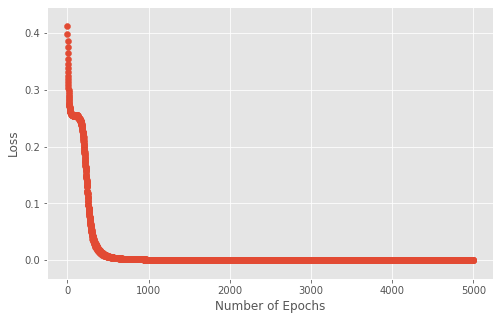

In [2481]:
NN.plot_error()